In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [27]:
df = pd.read_csv('/content/drive/MyDrive/day31-power-transformer/concrete_data.csv')

In [28]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [29]:
df.shape

(1030, 9)

In [30]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [31]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [32]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [33]:
X = df.drop(columns=['Strength']) #input features
y = df.iloc[:, -1] #target variable

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
# Applying Regression without any transformation
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.627553179231485

In [36]:
# Cross checking with cross val score
lr = LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

0.46099404916628606

Plots without Transformation

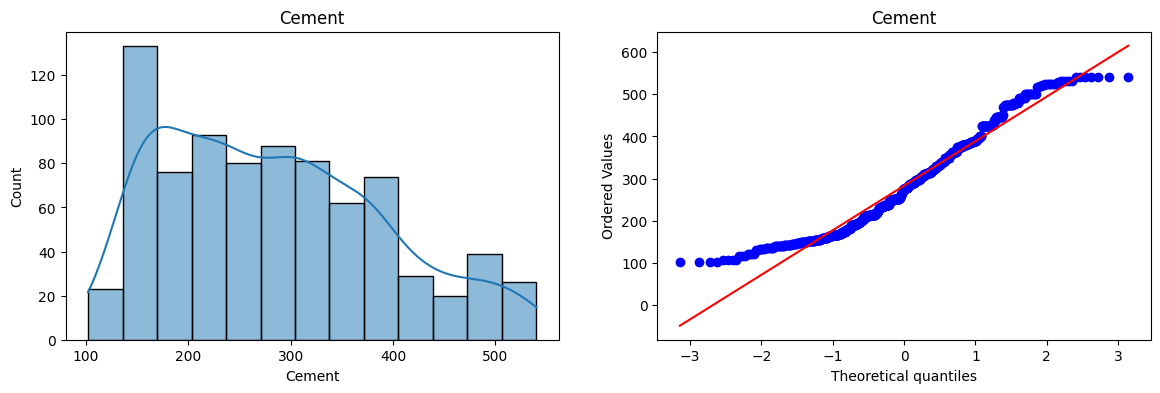

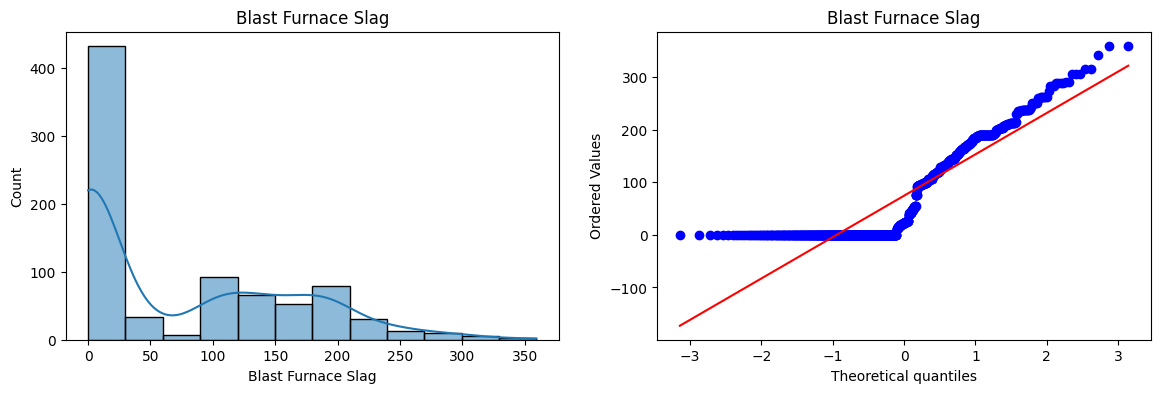

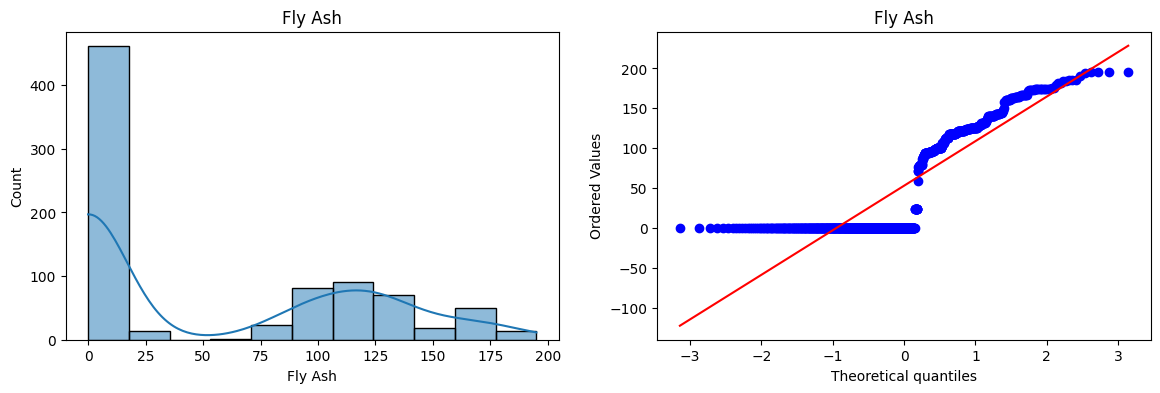

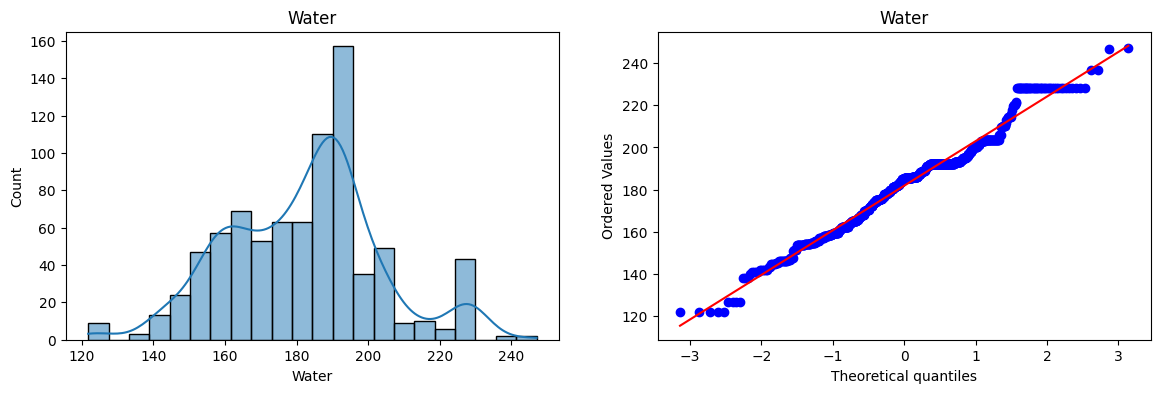

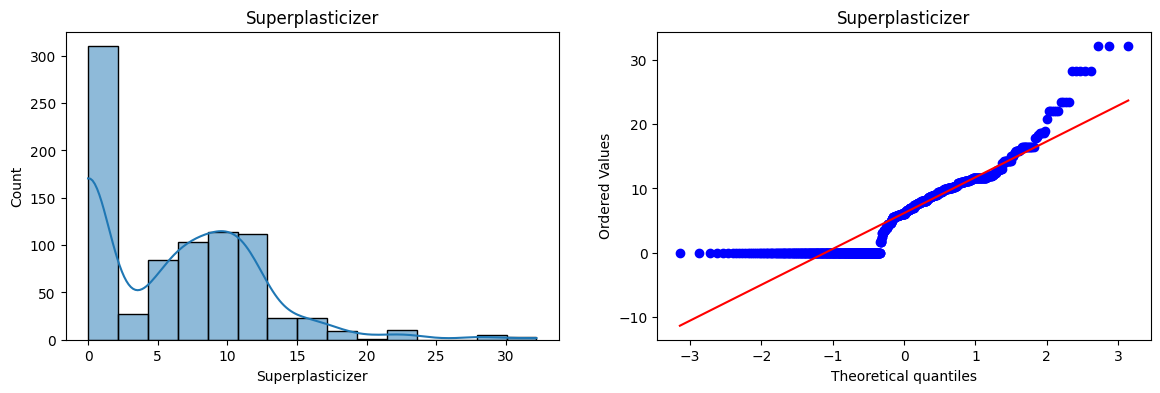

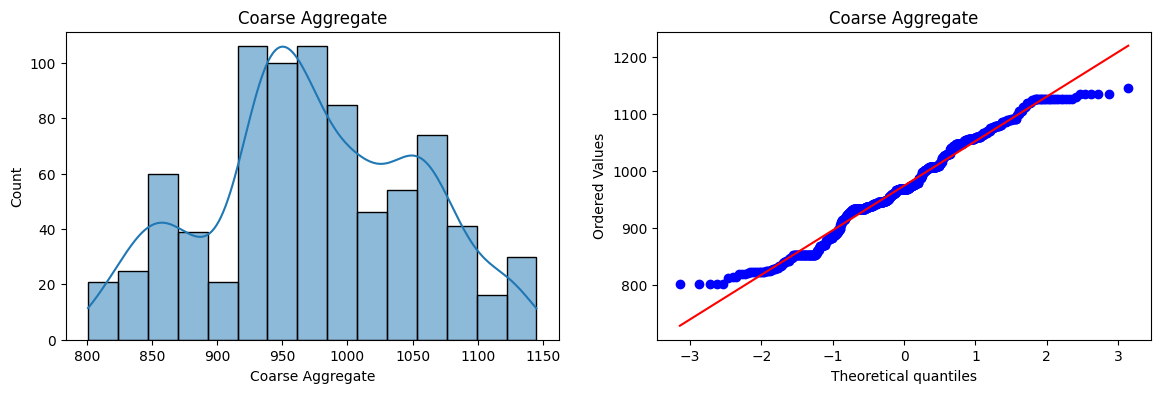

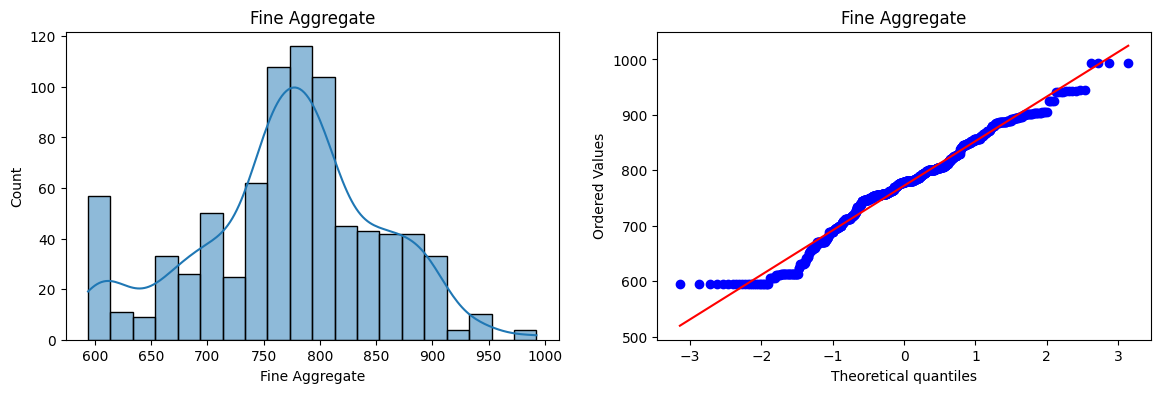

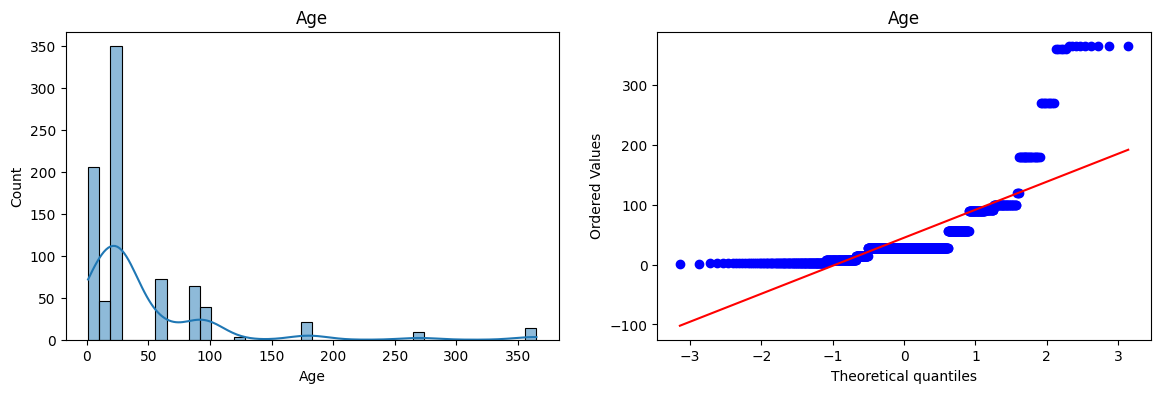

In [37]:
# Plotting the distplots without any transformation

for col in X_train.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.histplot(X_train[col], kde=True)
  plt.title(col)

  plt.subplot(122)
  stats.probplot(X_train[col], dist="norm", plot=plt)
  plt.title(col)

  plt.show()

Box-Cox

In [38]:
#Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_trans = pt.fit_transform(X_train + 1e-9)
X_test_trans = pt.transform(X_test + 1e-9)

In [39]:
pd.DataFrame({'cols' : X_train.columns, 'box_cox_lambda':pt.lambdas_})

,cols,box_cox_lambda
0,Cement,0.177025
1,Blast Furnace Slag,0.019115
2,Fly Ash,-0.028337
3,Water,0.772682
4,Superplasticizer,0.070353
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [40]:
#Applying linear regression on transformed data

lr = LinearRegression()

lr.fit(X_train_trans, y_train)

y_pred = lr.predict(X_test_trans)
r2_score(y_test, y_pred)

0.8034834019790229

In [41]:
#using cross validation score

pt = PowerTransformer(method='box-cox')
X_trans = pt.fit_transform(X + 1e-9)

lr = LinearRegression()

np.mean(cross_val_score(lr, X_trans, y, scoring='r2', cv=5))

0.6651894392243024

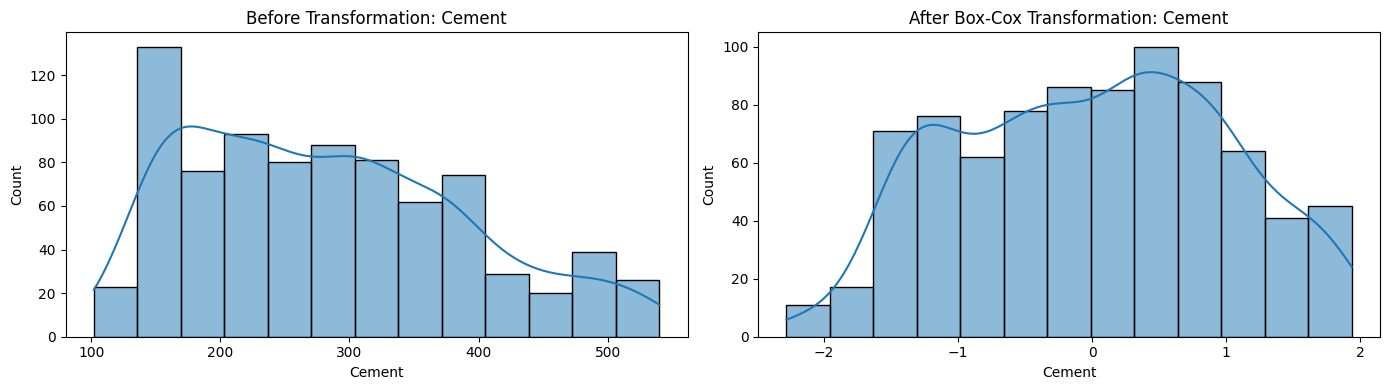

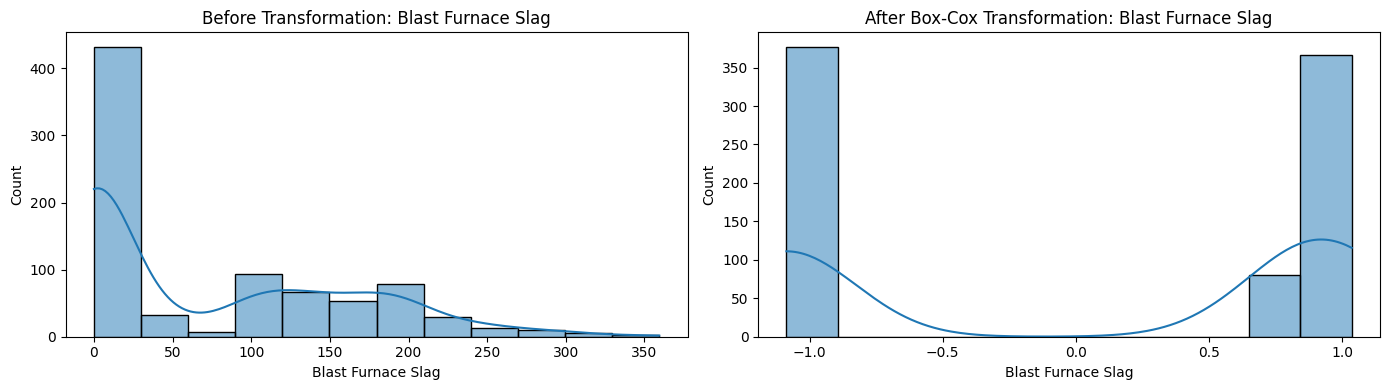

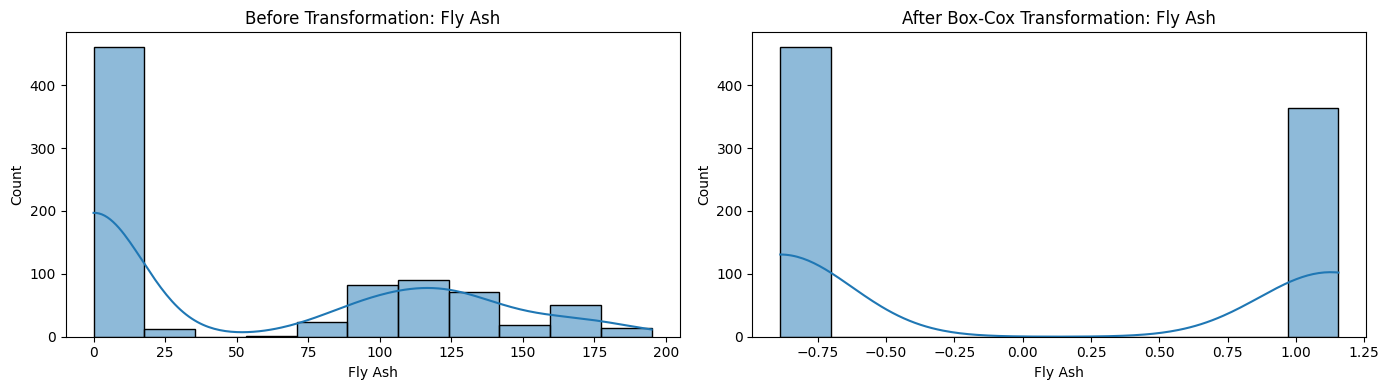

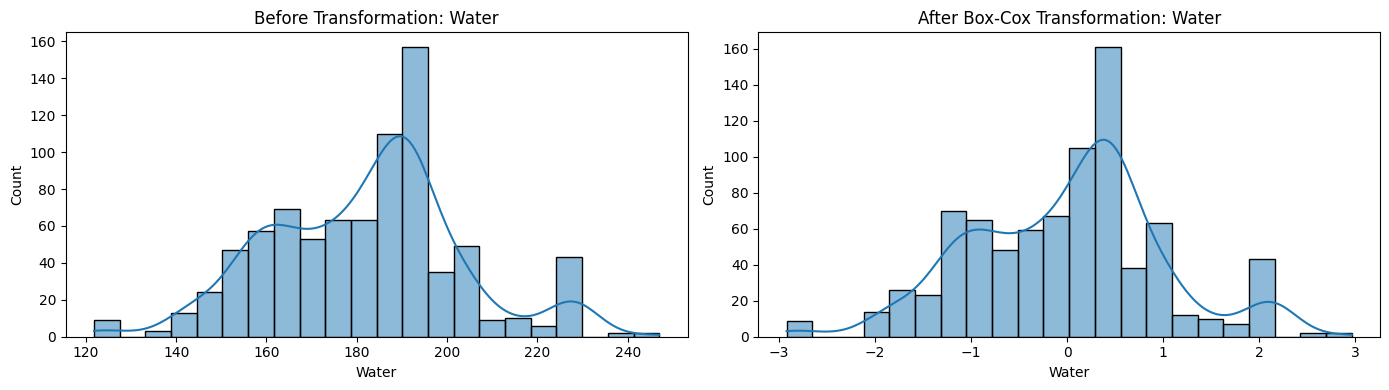

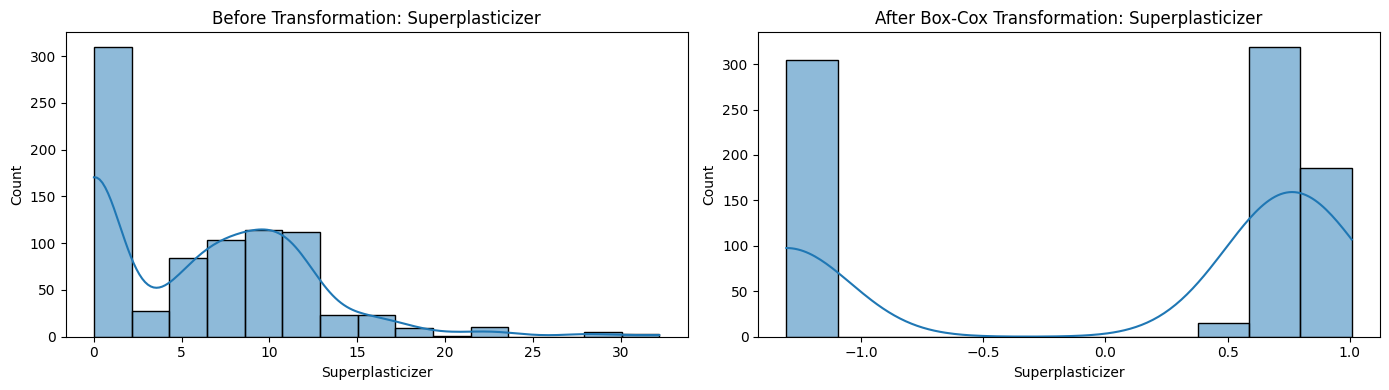

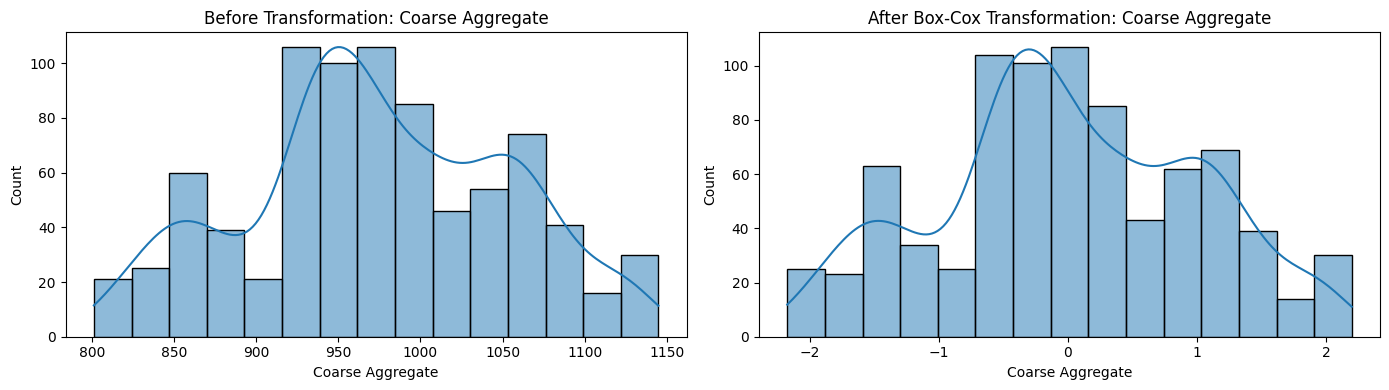

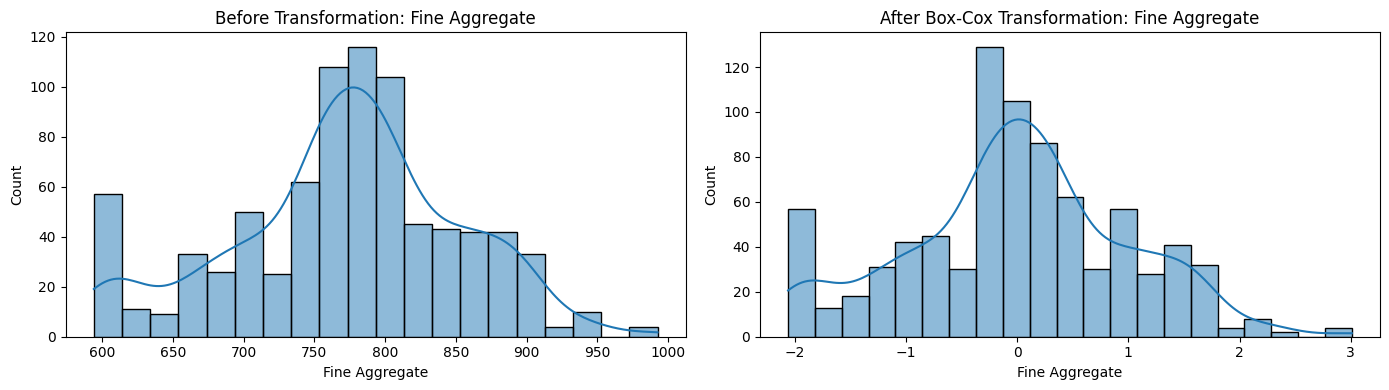

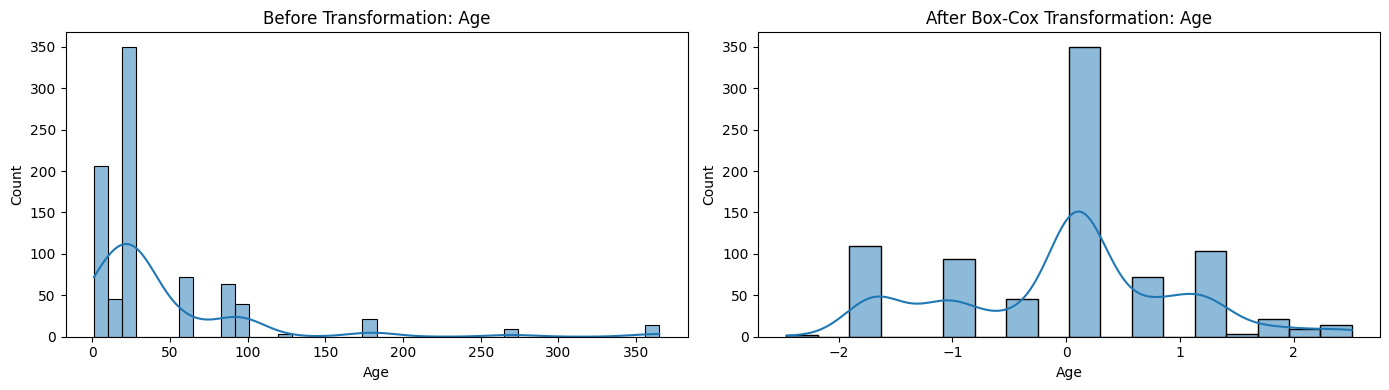

In [43]:
#Before and after comparison for Box-Cox Plot

X_train_trans = pd.DataFrame(X_train_trans, columns=X_train.columns)

for col in X_train_trans.columns:
  plt.figure(figsize=(14, 4))

  # Before Transformation
  plt.subplot(1, 2, 1)
  sns.histplot(X_train[col], kde=True)
  plt.title(f"Before Transformation: {col}")

  # After Box-Cox Transformation
  plt.subplot(1, 2, 2)
  sns.histplot(X_train_trans[col], kde=True)
  plt.title(f"After Box-Cox Transformation: {col}")

  plt.tight_layout()  # Prevent overlap
  plt.show()

Yeo-Johnson Transformation

In [44]:
#apply Yeo-Johnson transform

#Default is method='yeo-johnson'
pt2 = PowerTransformer()

X_train_trans2 = pt2.fit_transform(X_train)
X_test_trans2 = pt2.transform(X_test)


lr = LinearRegression()
lr.fit(X_train_trans2, y_train)

y_pred2 = lr.predict(X_test_trans2)

print(r2_score(y_test, y_pred2))

pd.DataFrame({'cols': X_train.columns, 'Yeo-Johnson_lambda':pt2.lambdas_ })

0.8161906512004999


,cols,Yeo-Johnson_lambda
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [45]:
#applying cross val score

pt = PowerTransformer()

X_trans2 = pt.fit_transform(X)

lr = LinearRegression()

# 5 folds
np.mean(cross_val_score(lr, X_trans2, y, scoring='r2', cv=5))

0.6834625141500866

In [48]:
print(X_train_trans2.shape)
X_train_trans2

(824, 8)


array([[-1.2797506 ,  1.0181684 ,  1.13099335, ..., -0.26250397,
        -0.67756699,  0.10577763],
       [ 1.2448127 ,  0.22258409,  1.16667068, ..., -1.91271708,
        -0.3140633 ,  0.10577763],
       [ 0.07975145, -1.05692806,  1.14363683, ...,  1.01840694,
         0.02595441, -1.664976  ],
       ...,
       [-0.84466055, -1.05692806,  1.15215184, ...,  1.34537013,
         0.29715299,  1.25751143],
       [ 1.56574084,  0.92179625, -0.88493182, ..., -1.53724924,
         0.07620785,  0.10577763],
       [ 0.42653433, -1.05692806,  1.12367271, ..., -0.62083672,
         0.09510487,  0.10577763]])

In [50]:
X_train_trans2 = pd.DataFrame(X_train_trans2, columns=X_train.columns)
X_train_trans2.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.279751,1.018168,1.130993,-0.301917,1.250424,-0.262504,-0.677567,0.105778
1,1.244813,0.222584,1.166671,-0.165051,0.643937,-1.912717,-0.314063,0.105778
2,0.079751,-1.056928,1.143637,-1.047299,0.796163,1.018407,0.025954,-1.664976
3,-0.145770,0.835725,1.009268,0.581232,0.585508,-1.750770,0.583249,0.105778
4,-1.131111,0.487511,1.150162,-1.105305,0.886463,1.368579,0.262619,-1.664976


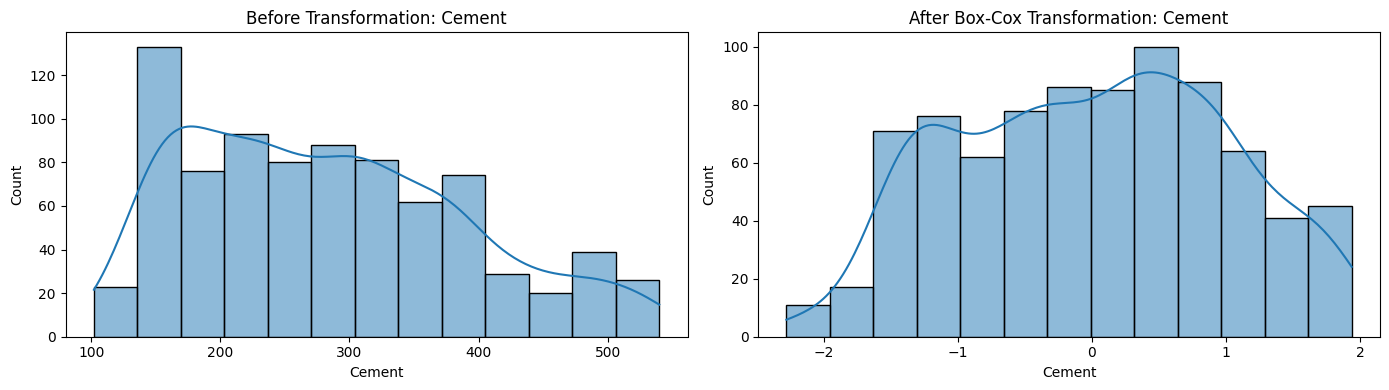

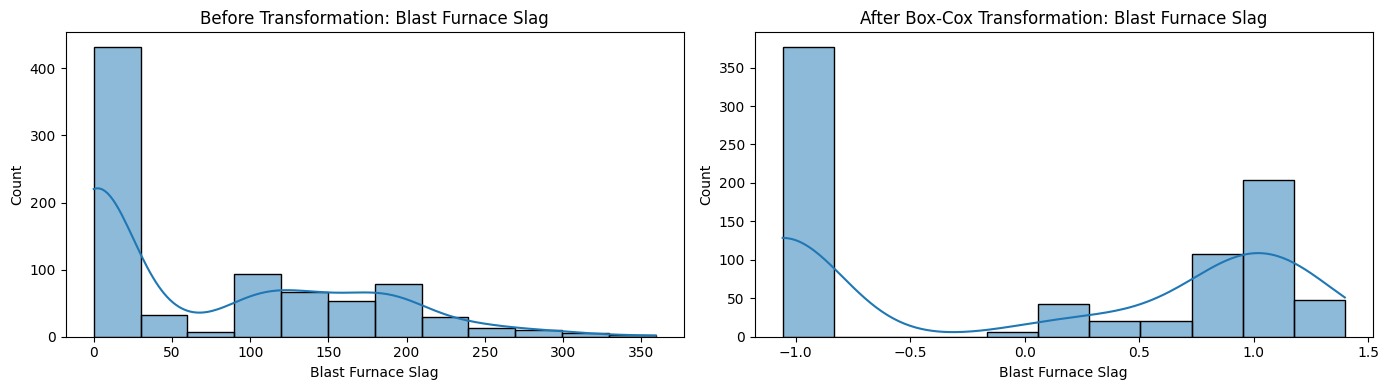

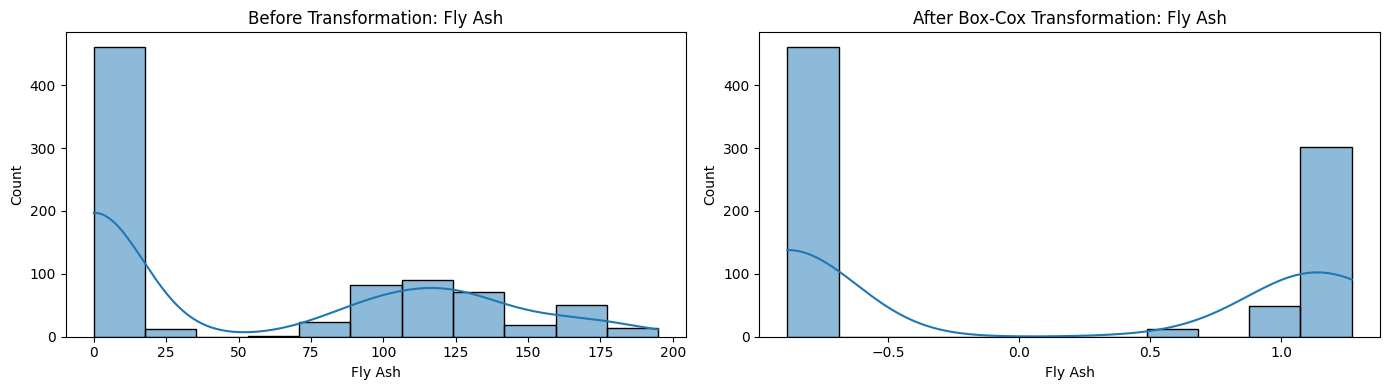

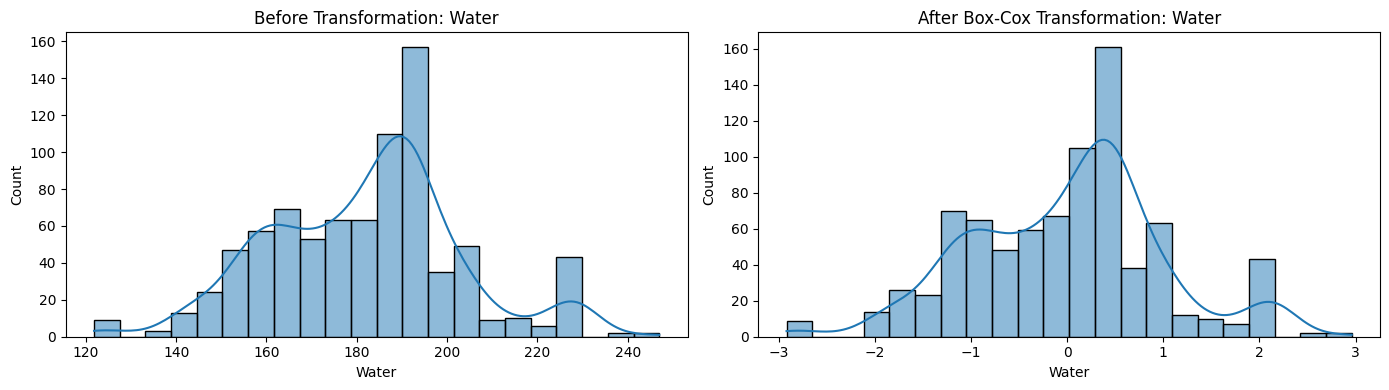

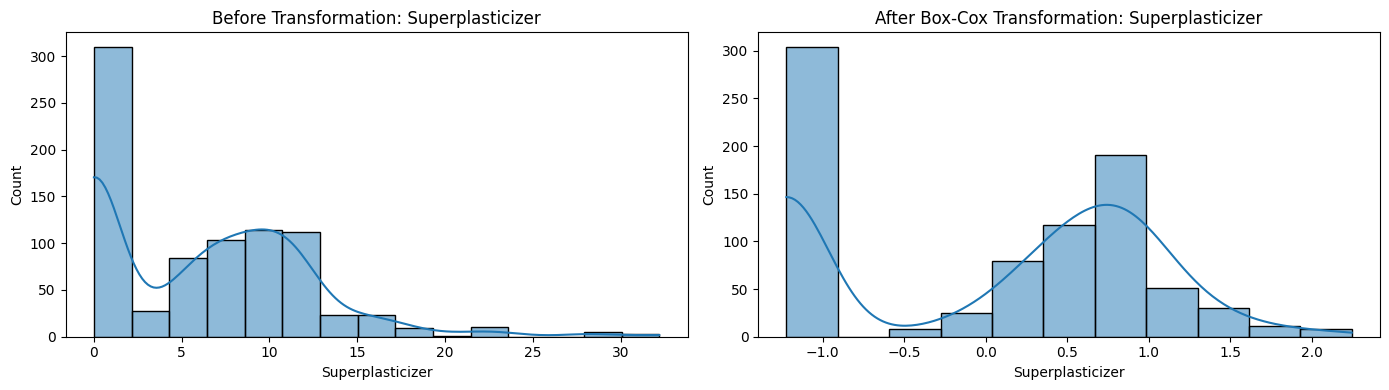

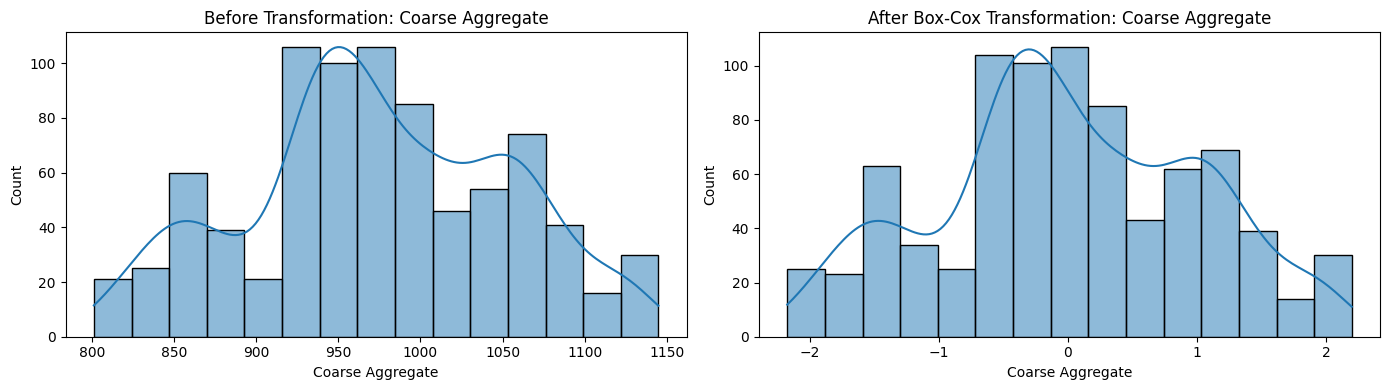

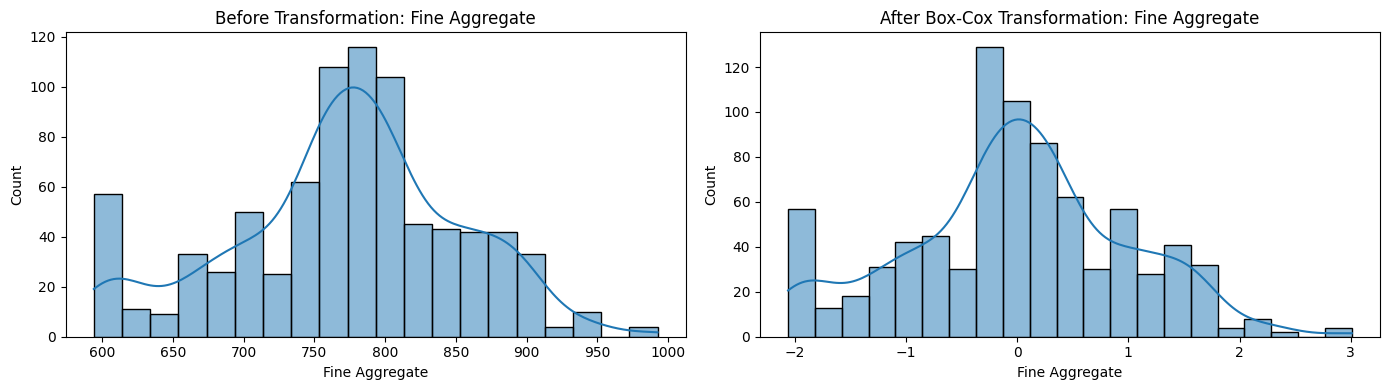

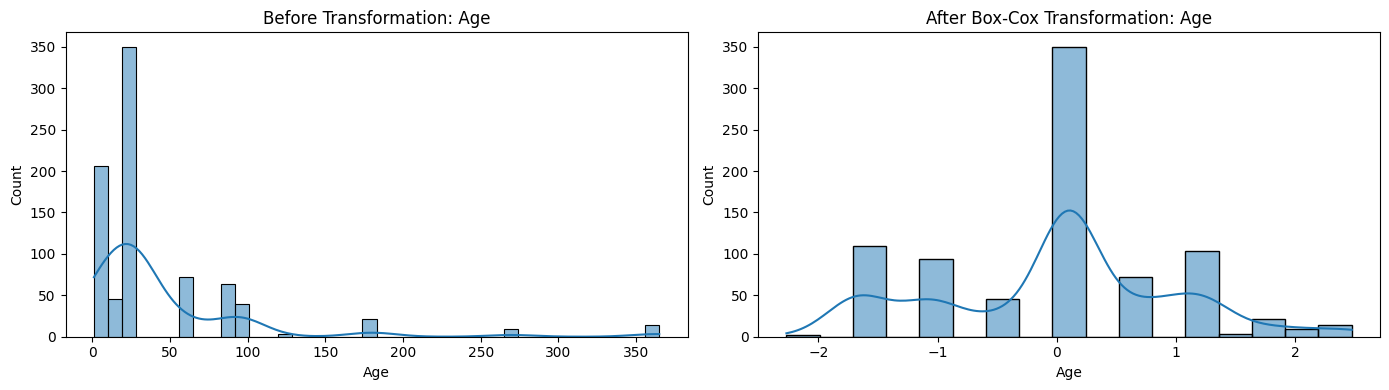

In [51]:
# Before and After comparison for Yeo-Johnson

for col in X_train_trans2.columns:

  plt.figure(figsize=(14, 4))
  # Before Transformation
  plt.subplot(121)
  sns.histplot(X_train[col], kde=True)
  plt.title(f"Before Transformation: {col}")

  # After Box-Cox Transformation
  plt.subplot(122)
  sns.histplot(X_train_trans2[col], kde=True)
  plt.title(f"After Box-Cox Transformation: {col}")

  plt.tight_layout()  # Prevent overlap
  plt.show()

In [53]:
# Side by side Lambdas
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt2.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830763,1.783100
7,Age,0.001771,0.019885
